# Importing all the required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import LinearRegression

# Importing Data set

In [10]:
df=pd.read_csv('delivery_time.csv')


# Data Analysis

In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Delivery Time,21.0,13.5,19.75,24.0,29.0,15.35,19.0,9.5,17.9,18.75,...,10.75,16.68,11.5,12.03,14.88,13.75,18.11,8.0,17.83,21.5
Sorting Time,10.0,4.0,6.00,9.0,10.0,6.00,7.0,3.0,10.0,9.00,...,4.00,7.00,3.0,3.00,4.00,6.00,7.00,2.0,7.00,5.0


#### delivery_time.csv file contain 2 Rows[ "Delivery Time" , "Sorting Time"] and 21 columns .

In [12]:
df.rename(columns={"Delivery Time": "DT", "Sorting Time": "ST"},inplace=True)

#### renaming the columns as they contain whitespace which may cause error.

<AxesSubplot:>

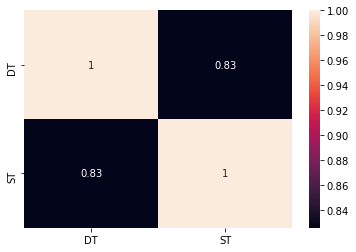

In [13]:
sns.heatmap(df.corr(),annot=True)

#### this is the Correlation between "Delivery Time" and "Sorting Time" columns data and as we can see that the relation between them is higher then 80% so we can use  "Sorting Time" to predict "Delivery Time"

Text(0, 0.5, 'Sorting Time')

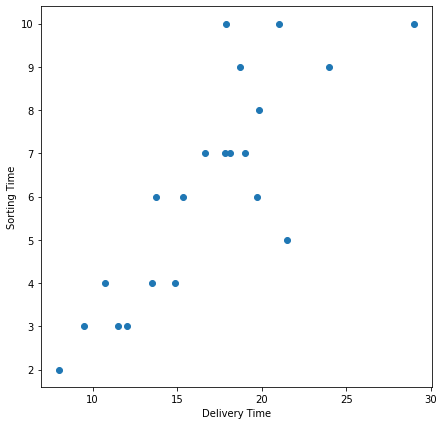

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(df['DT'],df['ST'])
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST', ylabel='count'>

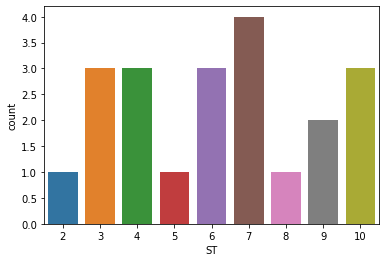

In [17]:
sns.countplot(df.ST)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

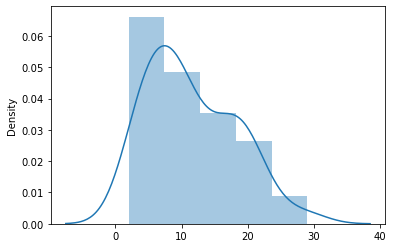

In [18]:
sns.distplot(df)

# Creating the regression model 

In [19]:
model = smf.ols("DT~ST",data = df).fit()

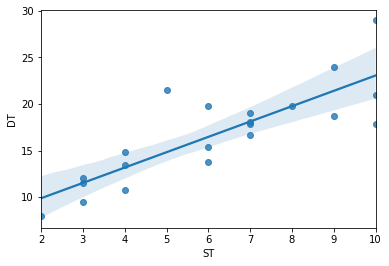

In [20]:
sns.regplot( x="ST", y="DT" , data=df);

In [21]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [23]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

#### As we can see R2 and Adj.R2 are close to each other that 

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        22:02:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
ypred=model.predict(df['ST'])

In [29]:
MSE= metrics.mean_squared_error(df['DT'],ypred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 2.7916503270617654


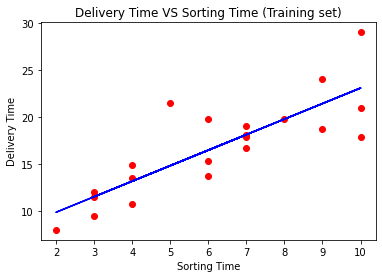

In [30]:
plt.scatter(df.ST, df.DT, color = 'red')
plt.plot(df.ST, ypred, color = 'blue')
plt.title('Delivery Time VS Sorting Time (Training set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Using the Sklearn Linear regression

In [31]:
x=df.iloc[:,:1]
y=df.iloc[:,1:2]

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=0)

In [33]:

lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [34]:
ypred1=lr.predict(xtest)

In [35]:
MSE= metrics.mean_squared_error(ytest,ypred1)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 2.1535721503595586


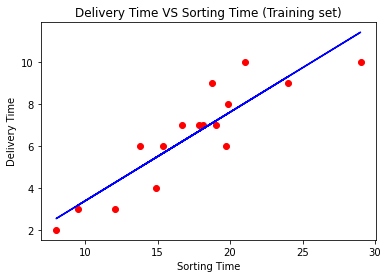

In [36]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, lr.predict(xtrain), color = 'blue')
plt.title('Delivery Time VS Sorting Time (Training set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

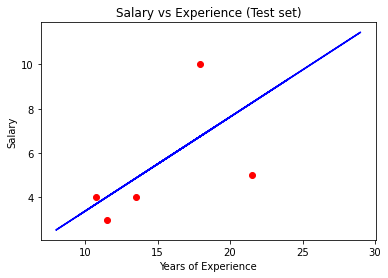

In [37]:
plt.scatter(xtest, ytest, color = 'red')
plt.plot(xtrain, lr.predict(xtrain), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# log transformation

In [39]:
log_model = smf.ols("DT~np.log(ST)", data = df).fit()


In [40]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        22:06:24   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
log_pred = log_model.predict(df['ST'])


In [43]:
MSE= metrics.mean_squared_error(df['DT'],log_pred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 2.733171476682066


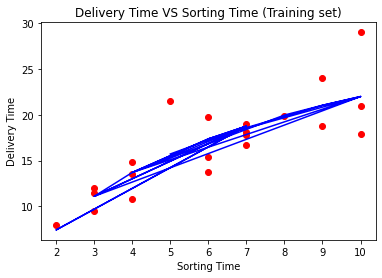

In [48]:
plt.scatter(df.ST, df.DT, color = 'red')
plt.plot(df.ST, log_pred, color = 'blue')
plt.title('Delivery Time VS Sorting Time (Training set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Exponenetial transformation

In [44]:
exp_model = smf.ols("np.log(DT)~ST", data = df).fit()


In [45]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                        22:10:45   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
exp_pred = exp_model.predict(df['ST'])
exp_pred = np.exp(exp_pred)

In [47]:
MSE= metrics.mean_squared_error(df['DT'],exp_pred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 2.940250323056201


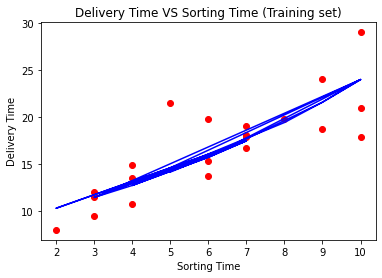

In [49]:
plt.scatter(df.ST, df.DT, color = 'red')
plt.plot(df.ST, exp_pred, color = 'blue')
plt.title('Delivery Time VS Sorting Time (Training set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()